In [4]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("/home/ubuntu/workspace/BBNI.JK.csv") 

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,8275.0,8300.0,8125.0,8275.0,7932.867676,25268600
1,2022-06-16,8400.0,8475.0,8250.0,8250.0,7908.901367,35080500
2,2022-06-17,8125.0,8250.0,8100.0,8175.0,7837.001953,42844900
3,2022-06-20,8200.0,8225.0,8050.0,8125.0,7789.069336,27255800
4,2022-06-21,8175.0,8450.0,8175.0,8450.0,8100.632324,27525700
...,...,...,...,...,...,...,...
242,2023-06-08,9150.0,9200.0,9075.0,9200.0,9200.000000,17161200
243,2023-06-09,9200.0,9225.0,9150.0,9225.0,9225.000000,17931900
244,2023-06-12,9250.0,9300.0,9175.0,9300.0,9300.000000,17173600
245,2023-06-13,9300.0,9300.0,9100.0,9125.0,9125.000000,20095000


In [11]:
# Menampilkan statistik deskriptif
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count   247.000000   247.000000   247.000000   247.000000   247.000000   
mean   8861.032389  8942.004049  8759.615385  8888.056680  8592.868818   
std     798.020447   796.007142   789.640853   563.871696   597.598844   
min       0.000000     0.000000     0.000000  7225.000000  6926.280273   
25%    8675.000000  8737.500000  8550.000000  8662.500000  8304.346192   
50%    9000.000000  9100.000000  8900.000000  9000.000000  8699.791016   
75%    9300.000000  9375.000000  9225.000000  9300.000000  9018.177246   
max    9900.000000  9950.000000  9675.000000  9900.000000  9575.000000   

             Volume  
count  2.470000e+02  
mean   2.858401e+07  
std    1.609389e+07  
min    0.000000e+00  
25%    1.804750e+07  
50%    2.440930e+07  
75%    3.442085e+07  
max    1.390669e+08  


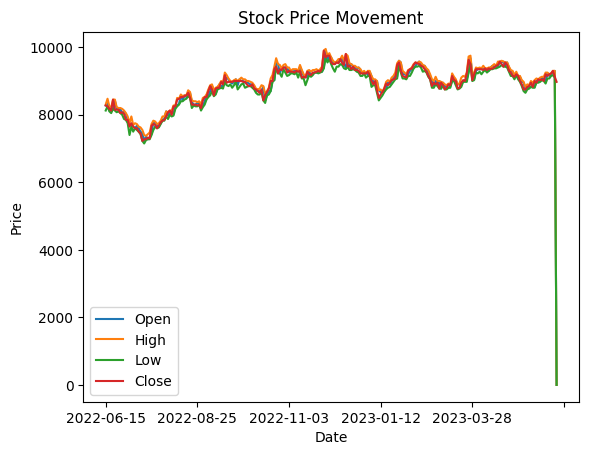

In [12]:
# Melakukan plotting pergerakan harga
df.plot(x='Date', y=['Open', 'High', 'Low', 'Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Movement')
plt.legend()
plt.show()

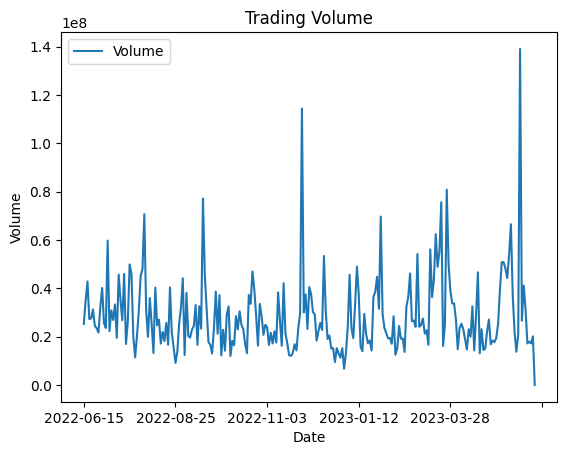

In [13]:
# Melakukan plotting volume perdagangan
df.plot(x='Date', y='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume')
plt.show()


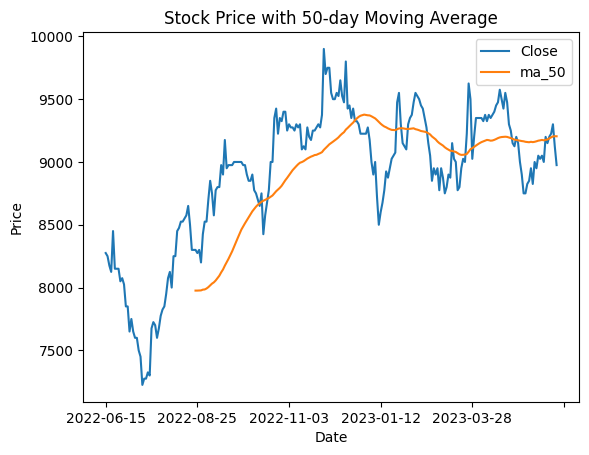

In [14]:
# Menghitung dan menambahkan moving average 50 hari
df['ma_50'] = df['Close'].rolling(window=50).mean()

# Plotting pergerakan harga dengan moving average
df.plot(x='Date', y=['Close', 'ma_50'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 50-day Moving Average')
plt.legend()
plt.show()


In [17]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ma_50'], dtype='object')


In [18]:
# Menghitung korelasi antara harga saham dan indeks pasar
correlation = df['Close'].corr(df['Volume'])
print("Korelasi antara harga saham dan indeks pasar:", correlation)

Korelasi antara harga saham dan indeks pasar: -0.05473266583321635


KNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Memisahkan fitur dan label
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Melakukan normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Melatih model menggunakan data latih
knn.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.011850360348508553


Naive Bayes

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [26]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Label']


KeyError: 'Label'

----

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Memisahkan fitur dan label
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
reg_model = LinearRegression()

# Melatih model menggunakan data latih
reg_model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi pada data uji
y_pred = reg_model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 180136.65432861482


In [23]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.037084694735291926


-------

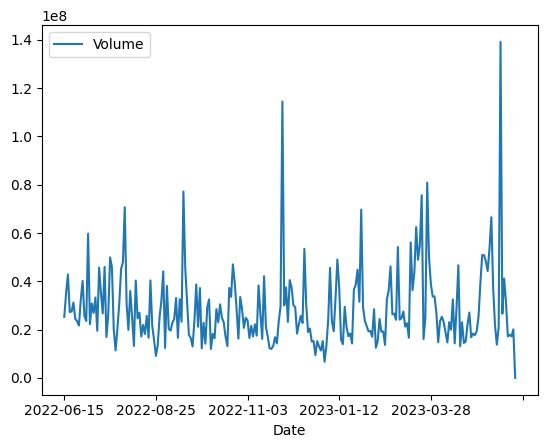

In [7]:
import matplotlib.pyplot as plt
df.plot(x="Date", y="Volume")
plt.show()

Model KNN

In [8]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 45):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

NameError: name 'training_set' is not defined

Model Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


In [2]:
Model Decicion Tree

SyntaxError: invalid syntax (400640715.py, line 1)

In [6]:

# Membagi dataset menjadi fitur dan label
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Volume']

# Melakukan normalisasi data fitur
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN dengan K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNNN:", accuracy)



Akurasi model KNN: 0.0
